# Klasyfikacja jakości bananów z wykorzystaniem metod uczenia maszynowego i modelu hybrydowego
Michał Lata (s223352), Semion Lisichik (s217519), Kamil Kluska (s223388),  Igor Kucharski (s223535), Stanisław Mierzejewski (s223558)

## Streszczenie
Niniejsze sprawozdanie koncentruje się na klasyfikacji jakości bananów z wykorzystaniem zaawansowanych technik uczenia maszynowego. Przedstawiono analizę opartą na trzech klasycznych algorytmach: regresji logistycznej, maszynach wektorów nośnych (SVM) oraz k-najbliższych sąsiadach (KNN). Kluczowym elementem badania jest zaprezentowanie modelu hybrydowego, który integruje wyniki tych algorytmów w celu zwiększenia precyzji klasyfikacji. Przeprowadzone eksperymenty wykazały, że model hybrydowy osiągnął najlepsze rezultaty pod względem precyzji i wskaźnika recall, co wskazuje na jego wysoką skuteczność w przewidywaniu jakości bananów.

### Słowa kluczowe
1. analiza danych
2. klasyfikacja jakości bananów
3. regresja logistyczna
4. maszyny wektorów nośnych (SVM)
5. k-najbliżsi sąsiedzi (KNN)
6. model hybrydowy
7. uczenie maszynowe
8. przetwarzanie danych


## Wprowadzenie
Współczesny rynek produktów rolnych stawia wysokie wymagania w zakresie jakości, a banany, jako jeden z najczęściej spożywanych owoców na świecie, są szczególnie wrażliwe na różnice w ich stanie i dojrzałości. Skuteczna klasyfikacja jakości bananów ma kluczowe znaczenie zarówno dla producentów, w celu optymalizacji zbiorów i dystrybucji, jak i dla konsumentów, gwarantując dostęp do produktów najwyższej świeżości. Tradycyjne metody oceny jakości, często oparte na subiektywnej ocenie wizualnej i dotykowej, są czasochłonne, podatne na błędy ludzkie i nieefektywne w przypadku dużych partii towaru. W odpowiedzi na te wyzwania, metody analizy danych i uczenia maszynowego oferują obiecujące rozwiązania, umożliwiając obiektywną i automatyczną klasyfikację na podstawie mierzalnych cech.

Niniejsze sprawozdanie ma na celu przedstawienie kompleksowej analizy zastosowania metod uczenia maszynowego do precyzyjnej klasyfikacji jakości bananów. Skupiono się na zbadaniu i porównaniu wydajności trzech powszechnie stosowanych algorytmów klasyfikacji: regresji logistycznej, maszyn wektorów nośnych (SVM) oraz k-najbliższych sąsiadów (KNN). Każda z tych metod posiada unikalne właściwości i podejścia do modelowania danych, co pozwala na wszechstronną ocenę ich przydatności w kontekście analizy jakości produktów rolnych. Ponadto, w celu dalszej poprawy dokładności przewidywań, opracowano i zaimplementowano model hybrydowy. Model ten łączy predykcje z poszczególnych algorytmów, wykorzystując ich mocne strony i minimalizując ograniczenia pojedynczych metod, co ma na celu osiągnięcie wyższego poziomu generalizacji i niezawodności. Celem badania jest nie tylko porównanie indywidualnej skuteczności każdej z wybranych metod klasyfikacji, ale także ocena, w jakim stopniu integracja tych algorytmów w modelu hybrydowym może przyczynić się do znaczącej poprawy dokładności klasyfikacji jakości bananów. Dalsze sekcje sprawozdania przedstawiają szczegółowy opis wykorzystanych danych, zastosowanych metod, przebieg eksperymentów, uzyskane wyniki oraz dyskusję na temat ich implikacji, a także wnioski końcowe i propozycje dalszych badań.

## Cel i zakres badania 
Celem badania było opracowanie i porównanie skuteczności trzech metod klasyfikacji (regresja logistyczna, SVM, KNN) w przewidywaniu jakości bananów na podstawie cech takich jak dojrzałość, zawartość cukru, twardość, długość, waga oraz czynniki środowiskowe. Dodatkowo, celem było stworzenie modelu hybrydowego, który łączy wyniki tych trzech algorytmów, aby poprawić dokładność klasyfikacji.

## Opis zmiennych w ramce danych

1. variety - Odmiana banana : (Blue Java, Burro, Cavendish, Fehi, Lady Finger, Manzano, Plantain, Red Dacca)
2. region - Kraj/region, w którym wyhodowano banana : (Brazil, Colombia, Costa Rica, Ecuador, Guatemala, Honduras, India, Philippines)
3. quality_category - Kategoria jakościowa banana : (Good, Premium, Processing, Unripe)
4. ripeness_index - Wskaźnik dojrzałości banana : (1.02 - 7.00)
5. ripeness_category - Kategoria określająca stopień dojrzałości : (Green, Overripe, Ripe, Turning)
6. sugar_content_brix - Zawartość cukru w bananie : (Brix – miara słodkości)
7. firmness_kgf - Twardość banana : (kgf – kilogram-siła)
8. length_cm - Długość banana w centymetrach
9. weight_g - Masa banana w gramach
10. harvest_date - Data zbioru banana
11. tree_age_years - Wiek drzewa bananowego
12. altitude_m - Wysokość nad poziomem morza, na której rosło drzewo
13. rainfall_mm - Suma opadów w regionie uprawy
14. soil_nitrogen_ppm - Zawartość azotu w glebie : (ppm - części na milion)

## Import potrzebnych bibliotek do analizy danych

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

## Wczytanie ramki danych

In [70]:
df = pd.read_csv("banana_quality_dataset.csv")
df.sample(5)

sample_id    variety       region  quality_score quality_category  \
199        200  Red Dacca   Costa Rica           2.07       Processing   
955        956  Red Dacca      Ecuador           3.34             Good   
886        887  Cavendish  Philippines           1.67       Processing   
389        390  Cavendish      Ecuador           2.28       Processing   
439        440  Red Dacca        India           1.96       Processing   

     ripeness_index ripeness_category  sugar_content_brix  firmness_kgf  \
199            1.78             Green               17.66          2.27   
955            6.60          Overripe               19.86          4.41   
886            1.06             Green               18.55          4.62   
389            3.72           Turning               19.82          3.50   
439            5.04              Ripe               16.08          4.68   

     length_cm  weight_g harvest_date  tree_age_years  altitude_m  \
199      22.34    128.07   2023-10-17             3.3      1421.0   
955      24.98    185.83   2023-10-22             8.5       794.7   
886      16.86    176.19   2023-09-09             5.7       315.1   
389      10.88    226.78   2023-09-21            12.2       635.7   
439      14.81    223.45   2023-09-04            11.5       191.1   

     rainfall_mm  soil_nitrogen_ppm  
199       1131.8              118.4  
955       1645.4               76.4  
886       2449.7              179.3  
389       1180.4              114.3  
439       1827.9              145.9

In [71]:
df.shape

(1000, 16)

In [72]:
df['harvest_date'].sort_values()

468    2023-09-01
262    2023-09-01
824    2023-09-01
473    2023-09-01
580    2023-09-01
          ...    
847    2023-10-31
438    2023-10-31
287    2023-10-31
596    2023-10-31
125    2023-10-31
Name: harvest_date, Length: 1000, dtype: object

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami próbek (sample_id) oraz kolumnę quality_score w związku z tym, że jest ona jedną z dwóch do wyboru zmiennych celu (wraz z quality_category), a interesuje nas klasyfikacja wieloklasowa, więc wybieramy quality_category. Usuwamy też, harvest_date w związku z tym, że daty próbek są bardzo zbliżone do siebie oraz ripeness_category gdyż jest to powielenie ripeness_index.

In [73]:
df = df.drop(["sample_id",
             "quality_score",
             "harvest_date", "ripeness_category"], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [74]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index)
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) 

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [75]:
df.describe().transpose()

count        mean         std      min        25%  \
ripeness_index      1000.0     4.04217    1.753211     1.02     2.4475   
sugar_content_brix  1000.0    18.51683    2.034812    15.00    16.8275   
firmness_kgf        1000.0     2.70684    1.289252     0.50     1.5900   
length_cm           1000.0    19.88210    5.736318    10.00    14.9025   
weight_g            1000.0   164.73893   49.163073    81.05   122.3975   
tree_age_years      1000.0    10.87960    5.215554     2.00     6.3000   
altitude_m          1000.0   723.55670  427.372855     0.40   353.9500   
rainfall_mm         1000.0  1972.99280  564.467912  1000.50  1498.7500   
soil_nitrogen_ppm   1000.0   104.39130   53.607794    10.00    60.1500   

                         50%        75%      max  
ripeness_index         4.110     5.5625     7.00  
sugar_content_brix    18.500    20.3125    21.98  
firmness_kgf           2.680     3.8200     5.00  
length_cm             19.890    24.8000    29.95  
weight_g             163.365   205.7750   249.89  
tree_age_years        10.700    15.6000    20.00  
altitude_m           726.000  1071.7250  1498.40  
rainfall_mm         1957.400  2431.8000  2992.00  
soil_nitrogen_ppm    104.100   149.8500   199.90

## Obliczenie skośności

In [76]:
df[numerical_features].skew()

ripeness_index       -0.059245
sugar_content_brix   -0.022406
firmness_kgf          0.030561
length_cm             0.031794
weight_g              0.032442
tree_age_years        0.059766
altitude_m            0.063876
rainfall_mm           0.056509
soil_nitrogen_ppm     0.014225
dtype: float64

## Wyświetlenie typów kolumn

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_category    1000 non-null   object 
 3   ripeness_index      1000 non-null   float64
 4   sugar_content_brix  1000 non-null   float64
 5   firmness_kgf        1000 non-null   float64
 6   length_cm           1000 non-null   float64
 7   weight_g            1000 non-null   float64
 8   tree_age_years      1000 non-null   float64
 9   altitude_m          1000 non-null   float64
 10  rainfall_mm         1000 non-null   float64
 11  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(9), object(3)
memory usage: 93.9+ KB


In [78]:
df.isnull().sum()>0

variety               False
region                False
quality_category      False
ripeness_index        False
sugar_content_brix    False
firmness_kgf          False
length_cm             False
weight_g              False
tree_age_years        False
altitude_m            False
rainfall_mm           False
soil_nitrogen_ppm     False
dtype: bool

## Obsłużenie braków danych
Powyżej widać, że nie mamy braków danych, zatem nie musimy ich obsługiwać.

## Wykresy przed obsłużeniem outliers

### Histogramy

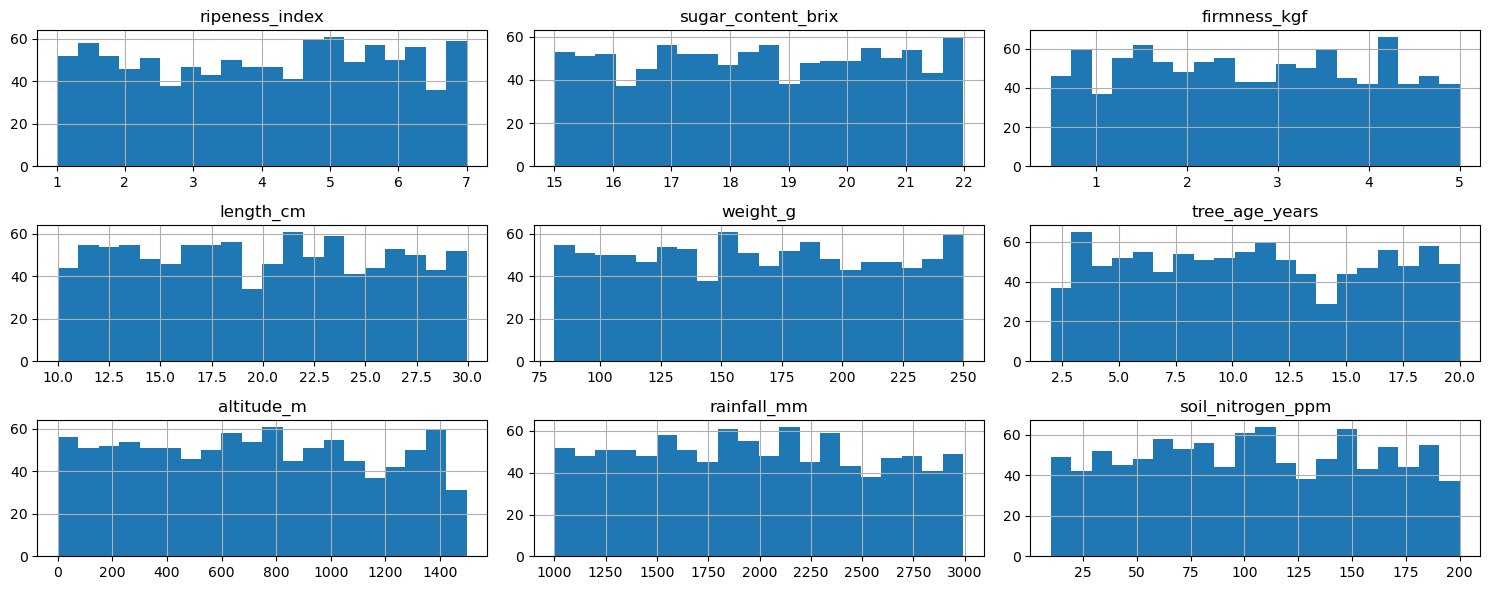

In [79]:
df.hist(bins=20, figsize=(15, 6), layout=(3, 3))
plt.tight_layout()
plt.show()

### Wykresy słupkowe

### Scalenie wartości unripe z processing i premium z good dla etykiety quality_category

Ostatecznie powstaje: 
<ul>
<li><b>1</b> - banan dobrej jakości (Good - Nadaje się w całości do sprzedaży)</li>
<li><b>0</b> - banan słabszej jakości (Processing - Nadaje się tylko do przetworzenia)</li>
</ul>

In [80]:
diction = {'Processing' : 0, 'Good' : 1 , 'Unripe': 0, 'Premium': 1}
df['quality_category'] = df['quality_category'].map(diction)

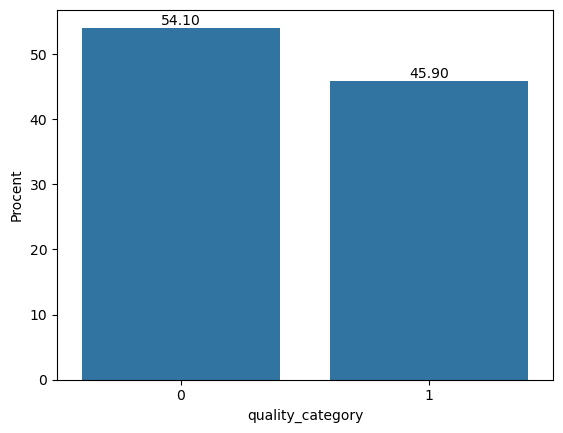

In [81]:
percents = df['quality_category'].value_counts()/df.shape[0]*100
ax = sns.barplot(x=percents.index, y=percents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.ylabel('Procent');

### Wykresy pudełkowe

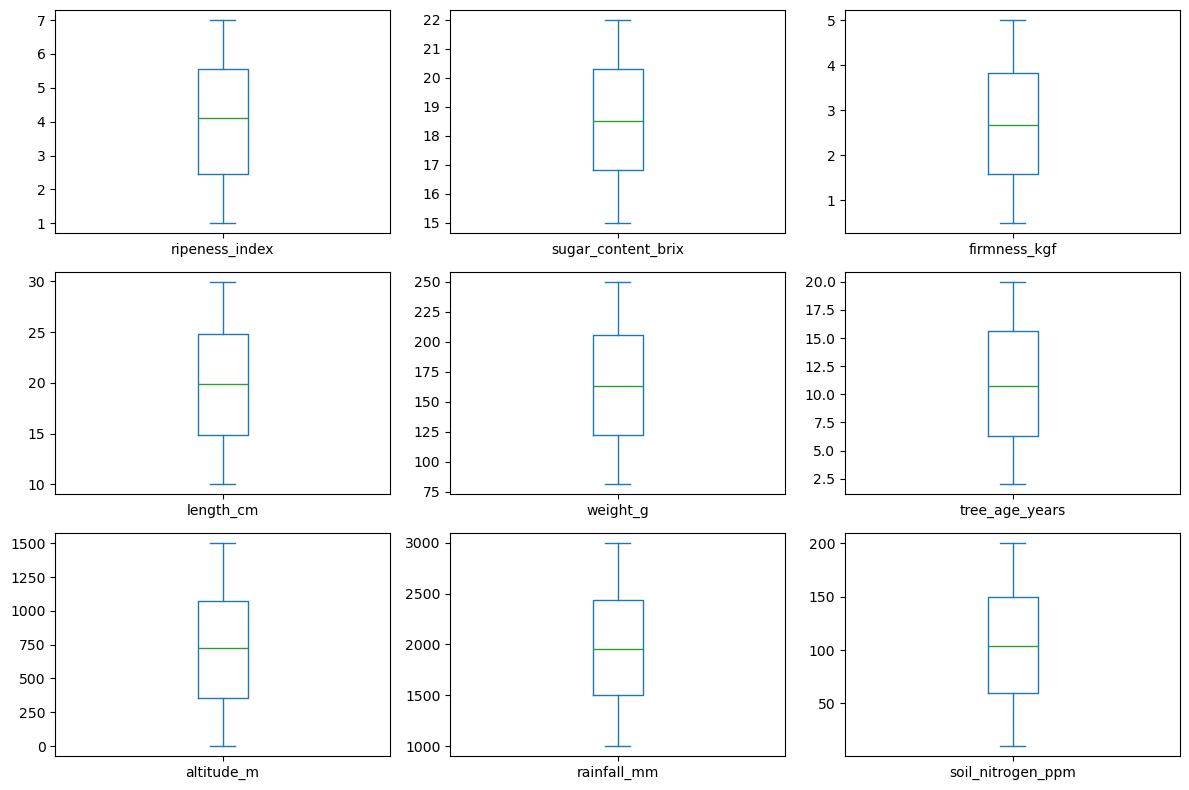

In [82]:
df[numerical_features].plot.box(subplots=True, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

## Obsługa outliers
Na powyższym wykresie można zauważyć, że nie ma outlierów, więc nie musimy ich obsługiwać.

## Obliczenie korelacji

In [83]:
df[numerical_features].corr()

ripeness_index  sugar_content_brix  firmness_kgf  \
ripeness_index            1.000000            0.027318     -0.005850   
sugar_content_brix        0.027318            1.000000     -0.013572   
firmness_kgf             -0.005850           -0.013572      1.000000   
length_cm                 0.032862           -0.008925     -0.044788   
weight_g                  0.030081           -0.020328      0.040061   
tree_age_years            0.042175           -0.028472     -0.016933   
altitude_m                0.050076           -0.046773     -0.022841   
rainfall_mm               0.003166           -0.005169      0.025458   
soil_nitrogen_ppm        -0.065418            0.013128      0.004460   

                    length_cm  weight_g  tree_age_years  altitude_m  \
ripeness_index       0.032862  0.030081        0.042175    0.050076   
sugar_content_brix  -0.008925 -0.020328       -0.028472   -0.046773   
firmness_kgf        -0.044788  0.040061       -0.016933   -0.022841   
length_cm            1.000000 -0.055880        0.020556   -0.008890   
weight_g            -0.055880  1.000000        0.007971    0.012290   
tree_age_years       0.020556  0.007971        1.000000    0.038132   
altitude_m          -0.008890  0.012290        0.038132    1.000000   
rainfall_mm          0.028341 -0.031945        0.001233   -0.049308   
soil_nitrogen_ppm    0.005156 -0.002808        0.013124   -0.008828   

                    rainfall_mm  soil_nitrogen_ppm  
ripeness_index         0.003166          -0.065418  
sugar_content_brix    -0.005169           0.013128  
firmness_kgf           0.025458           0.004460  
length_cm              0.028341           0.005156  
weight_g              -0.031945          -0.002808  
tree_age_years         0.001233           0.013124  
altitude_m            -0.049308          -0.008828  
rainfall_mm            1.000000           0.017463  
soil_nitrogen_ppm      0.017463           1.000000

## Generacja heat mapy korelacji

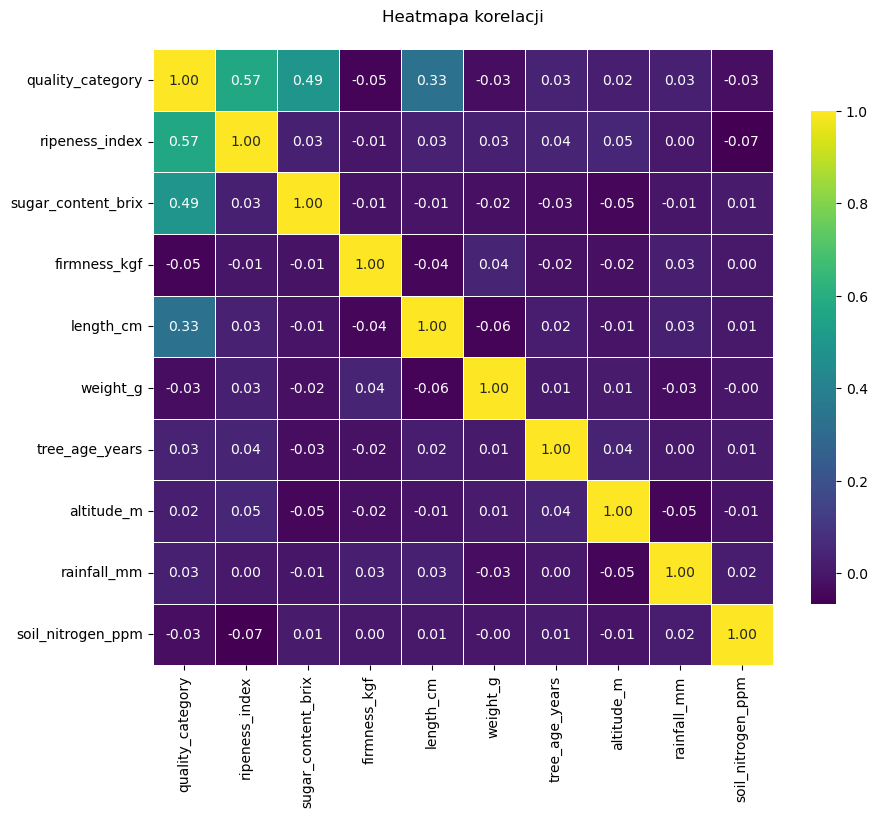

In [84]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()

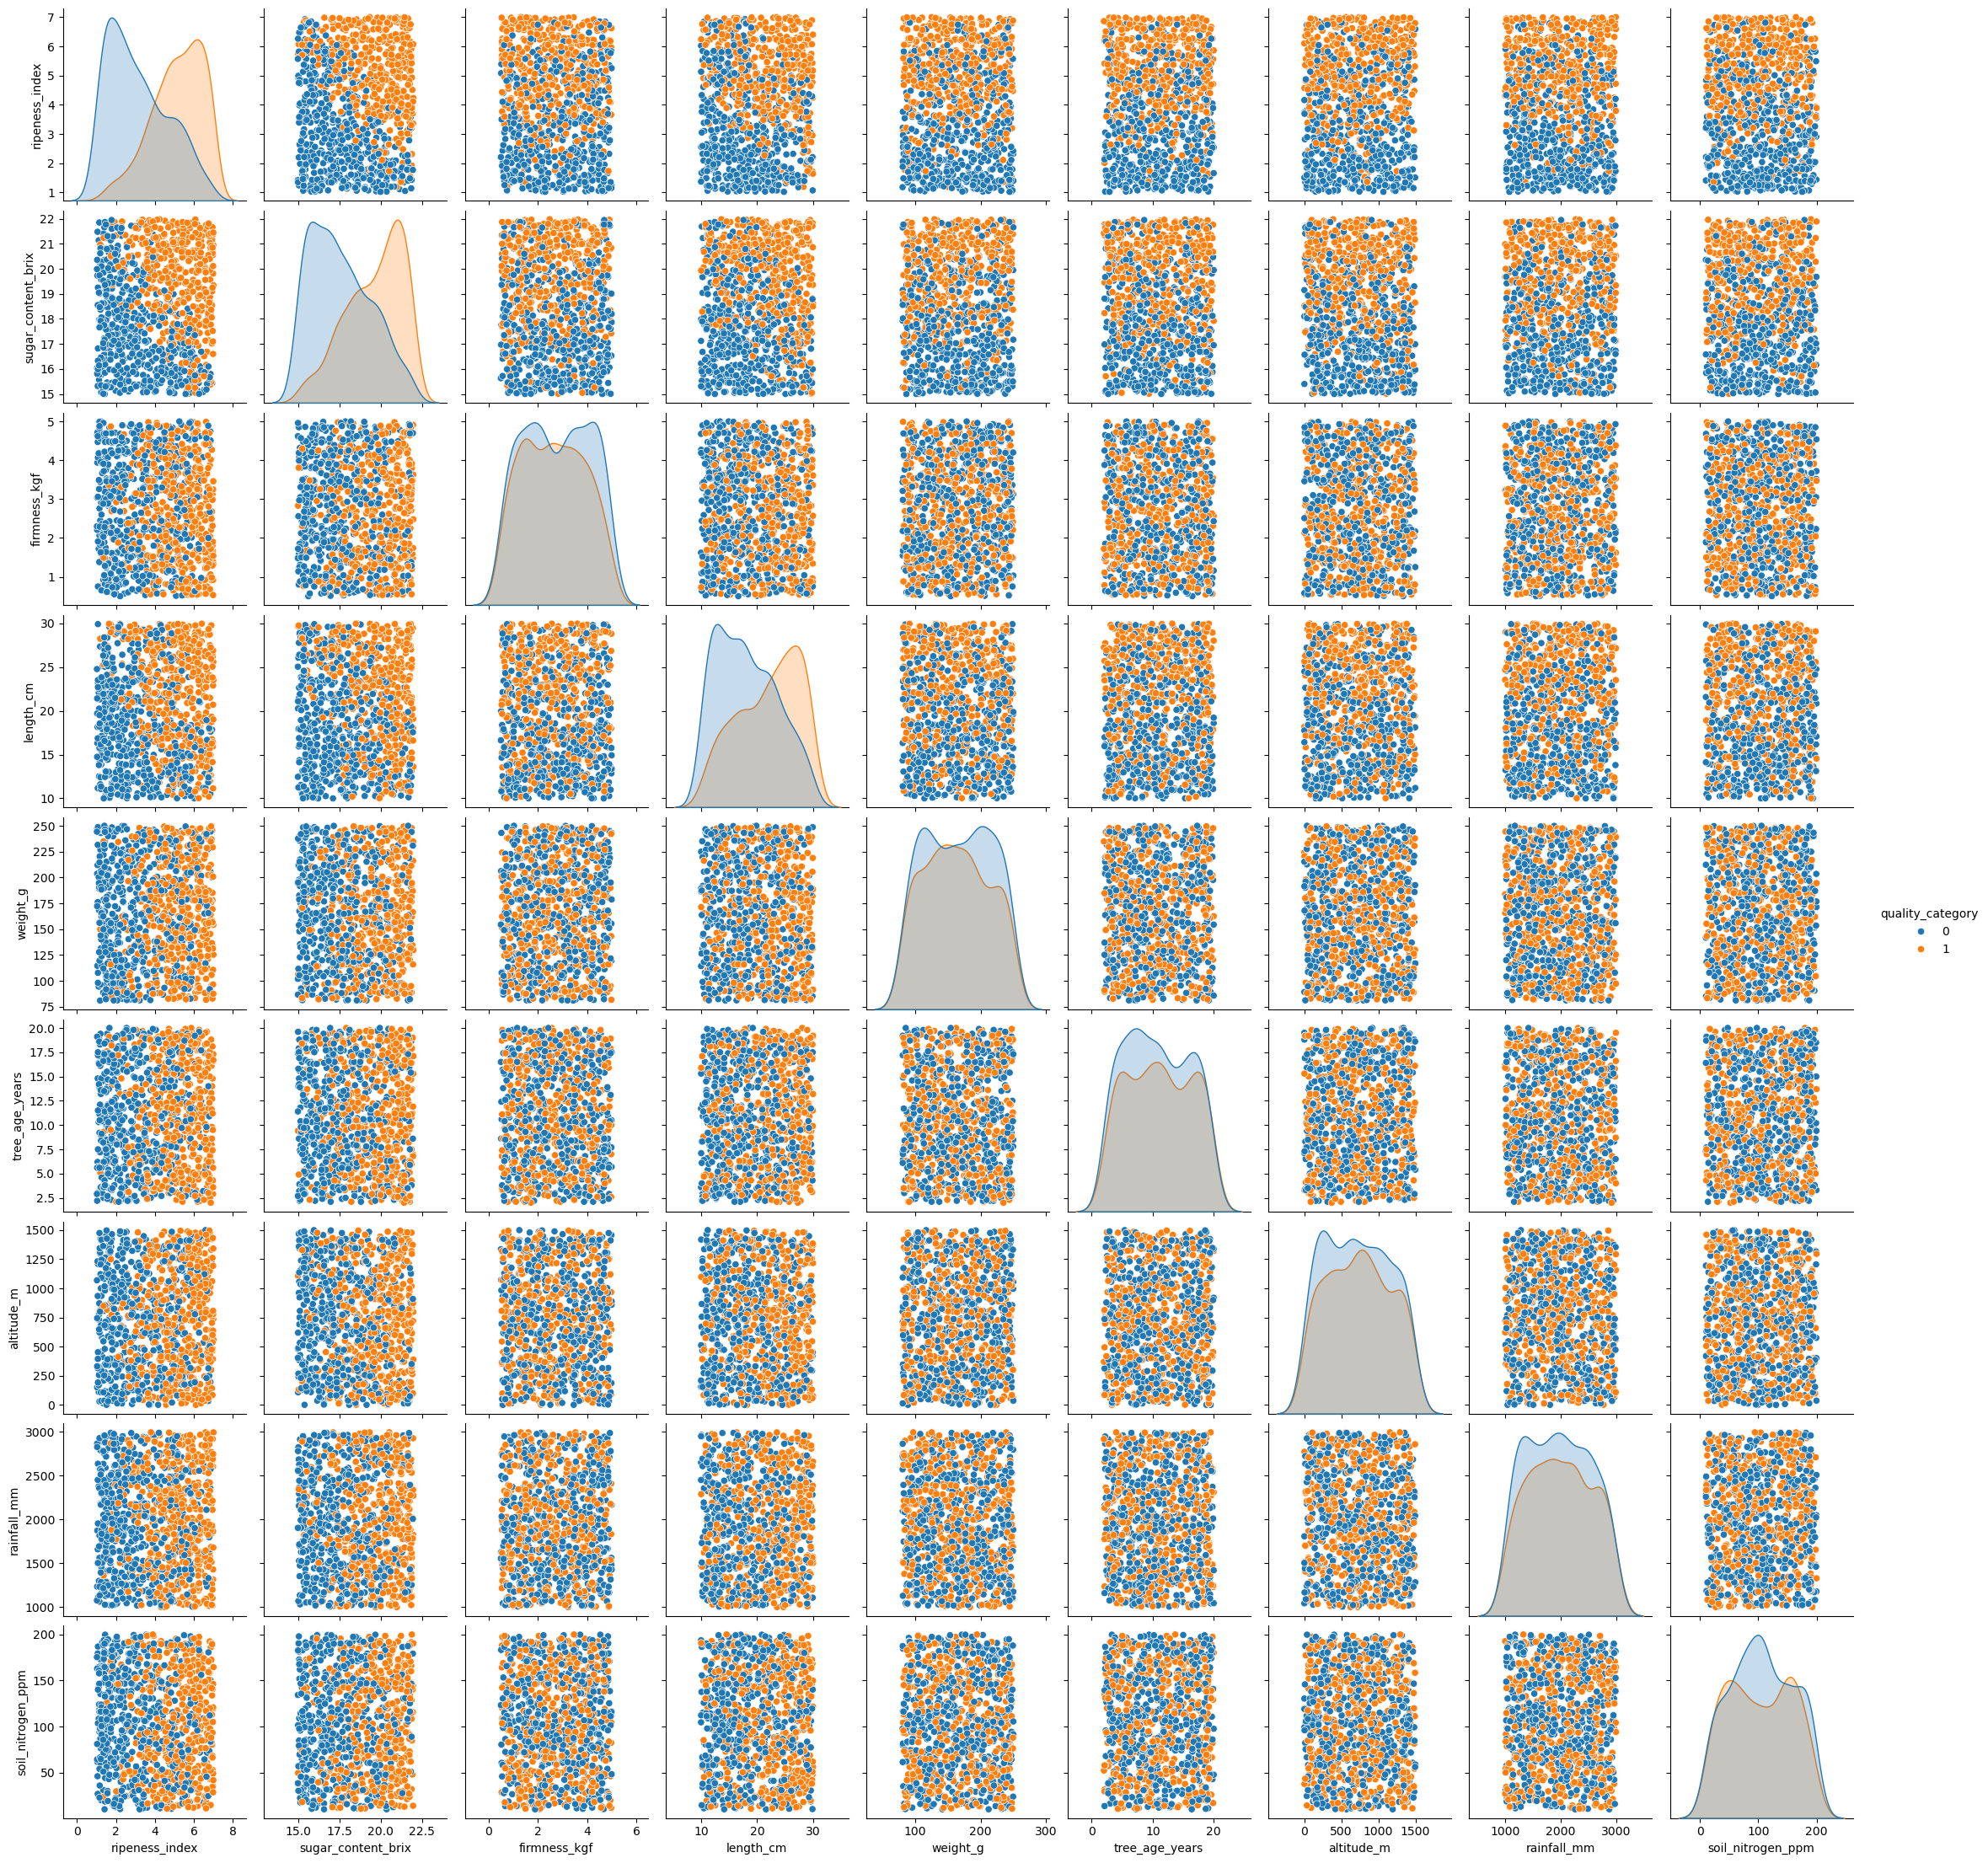

In [85]:
sns.pairplot(df, hue='quality_category')

In [86]:
df.sample(3)

variety      region  quality_category  ripeness_index  \
21       Burro     Ecuador                 0            2.78   
599  Blue Java  Costa Rica                 0            6.37   
272       Fehi       India                 0            5.68   

     sugar_content_brix  firmness_kgf  length_cm  weight_g  tree_age_years  \
21                18.92          2.45      14.81    154.02            17.4   
599               15.94          3.48      15.38    201.60            12.5   
272               18.41          3.76      13.03    130.64             3.2   

     altitude_m  rainfall_mm  soil_nitrogen_ppm  
21       1225.2       2683.6              175.6  
599       421.6       2310.8               85.7  
272       962.4       1139.3              136.1

## Przygotowanie danych do modelu (Standaryzacja, One-Hot Encoding, Podział na dane do trenowania i dane testowe)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [88]:
X = df.drop('quality_category', axis=1)
y = df['quality_category']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#  Standaryzacja (Standardization)

**Opis:**  
Standaryzacja to proces skalowania cech tak, aby miały średnią 0 i odchylenie standardowe 1. Przydatna np. dla regresji, SVM, PCA.

**Wzór:**  
$$
z = \frac{x - \mu}{\sigma}
$$

gdzie:
- $x$ – wartość oryginalna,
- $\mu$ – średnia z danej cechy,
- $\sigma$ – odchylenie standardowe.

**Zastosowanie:**  
- eliminuje wpływ różnych skal jednostek,
- przyspiesza uczenie się modelu,
- poprawia zbieżność optymalizacji.

---

#  One-Hot Encoding

**Opis:**  
Metoda przekształcania zmiennych kategorycznych na zmienne numeryczne. Dla każdej unikalnej kategorii tworzymy nową kolumnę z wartościami 0/1.

**Przykład:**  
Dla kolumny "Kolor" z wartościami `["czerwony", "zielony", "niebieski"]`:

| Kolor     | czerwony | zielony | niebieski |
|-----------|----------|---------|-----------|
| czerwony  | 1        | 0       | 0         |
| zielony   | 0        | 1       | 0         |
| niebieski | 0        | 0       | 1         |

**Zalety:**
- Pozwala modelom matematycznym pracować z danymi kategorycznymi.
- Nie wprowadza porządku, jak np. Label Encoding.


## Regresja Logistyczna i walidacja krzyżowa

#### Regresja logistyczna - omówienie metody z cytowaniem

Cunningham i Delany w swojej publikacji [1] proponują zastosowanie regresji logistycznej jako jednego z podstawowych narzędzi do klasyfikacji danych.  
Regresja logistyczna modeluje prawdopodobieństwo przynależności do klasy pozytywnej (np. wysoka jakość) jako funkcję sigmoid:

$$
P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

gdzie

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

- $x = (x_1, x_2, \ldots, x_n)$ — cechy,
- $\beta = (\beta_0, \beta_1, \ldots, \beta_n)$ — współczynniki modelu.

Decyzję o klasie podejmuje się na podstawie progu, np. \(P(y=1|x) > 0.5\).

---

# Walidacja krzyżowa (Cross-Validation)

**Opis:**  
Technika oceny modelu polegająca na podziale danych na *k* równych części (tzw. *foldy*). Model uczony jest na *k - 1* częściach, a testowany na jednej. Proces powtarza się *k* razy, każdorazowo z inną częścią jako testową.

**Wzór ogólny:**
$$
\text{CV}_{\text{score}} = \frac{1}{k} \sum_{i=1}^{k} \text{Score}_i
$$

gdzie:
- $\text{Score}_i$ — wartość metryki (np. Accuracy, F1 itp.) dla i-tego folda,
- $k$ — liczba foldów (często 5 lub 10).

---

# GridSearchCV – Strojenie hiperparametrów

**GridSearchCV** to narzędzie, które automatycznie przeszukuje zadany zbiór możliwych kombinacji hiperparametrów dla wybranego modelu w celu znalezienia najlepszych ustawień. Dopisek CV oznacza wbudowaną walidację krzyżową.

**Jak to działa?**

1. Definiujemy model.
2. Tworzymy siatkę (grid) możliwych wartości hiperparametrów jako słownik.


In [89]:
log_model = LogisticRegression(solver='saga', max_iter=5000,random_state=101)
param_grid = {'penalty': ['l1', 'l2'],
              'C':np.logspace(0,10,20)}

grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')

log_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', grid)
])

In [90]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=Logis...
                              param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [91]:
log_pipeline.named_steps['classifier'].best_params_

{'C': 1.0, 'penalty': 'l1'}

In [92]:
coef = log_pipeline.named_steps['classifier'].best_estimator_.coef_
coef

array([[ 7.07597477,  6.29196282, -0.44129292,  4.64073503, -0.09771064,
        -0.01317448,  0.04013656,  0.0087068 , -0.13051015,  0.        ,
         0.        ,  0.        ,  0.02738358, -0.13766158,  0.        ,
         0.16730808,  0.        ,  0.36085566, -0.21823472, -0.55889596,
         0.        ,  0.        , -0.28007425,  0.        ,  0.08455376]])

In [93]:
one_hot = pd.get_dummies(X).columns

features_coef = pd.Series(data=coef[0], index=one_hot)
features_coef[features_coef!=0].sort_values(axis=0)

region_Costa Rica     -0.558896
firmness_kgf          -0.441293
region_Honduras       -0.280074
region_Colombia       -0.218235
variety_Lady Finger   -0.137662
soil_nitrogen_ppm     -0.130510
weight_g              -0.097711
tree_age_years        -0.013174
rainfall_mm            0.008707
variety_Fehi           0.027384
altitude_m             0.040137
region_Philippines     0.084554
variety_Plantain       0.167308
region_Brazil          0.360856
length_cm              4.640735
sugar_content_brix     6.291963
ripeness_index         7.075975
dtype: float64

**Wartości ujemne** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie maleć  
**Wartości dodatnie** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie rosnąć

In [94]:
y_pred = log_pipeline.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

##  Mierniki jakości klasyfikatora

## 1. Accuracy (dokładność)
**Opis:**  
Udział poprawnie sklasyfikowanych przypadków (zarówno pozytywnych, jak i negatywnych) w ogólnej liczbie przypadków.

**Wzór:**  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Gdzie:**  
- $TP$ (True Positives) — liczba poprawnie zaklasyfikowanych przykładów pozytywnych.
- $TN$ (True Negatives) — liczba poprawnie zaklasyfikowanych przykładów negatywnych.
- $FP$ (False Positives) — liczba przykładów negatywnych błędnie zaklasyfikowanych jako pozytywne,
- $FN$ (False Negatives) — liczba przykładów pozytywnych błędnie zaklasyfikowanych jako negatywne.

---

## 2. Recall (czułość, trafność)
**Opis:**  
Recall to miara skuteczności klasyfikatora w wykrywaniu przykładów należących do klasy pozytywnej. Informuje, jaka część rzeczywistych przykładów pozytywnych została poprawnie zaklasyfikowana.

**Wzór:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$


---

## 3. Precision (precyzja)
**Opis:**  
Odsetek poprawnie przewidzianych pozytywnych przykładów względem wszystkich przykładów zaklasyfikowanych jako pozytywne.

**Wzór:**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

## 4. F1 Score
**Opis:**  
Średnia harmoniczna precyzji i czułości (Recall). Jest szczególnie przydatny przy niezrównoważonych klasach.

**Wzór:**  
$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}
$$

In [96]:
models_stat = {}
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = 2*(recall*precision)/(precision+recall)

models_stat['Logistic Regression']=[acc, recall, precision, f1]

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {f1}')

Accuracy score: 0.9666666666666667
Recall score: 0.951048951048951
Precision score: 0.9784172661870504
F1 score: 0.9645390070921986


### Confusion Matrix (Macierz Pomyłek)

**Confusion Matrix** to tabela służąca do oceny skuteczności klasyfikatora w problemach klasyfikacji binarnej (i nie tylko). Pokazuje, jak często klasyfikator poprawnie lub błędnie przewiduje każdą z klas.

#### Postać macierzy dla klasyfikacji binarnej:

|                  | Przewidziane: Pozytywne | Przewidziane: Negatywne |
|------------------|--------------------------|--------------------------|
| **Rzeczywiste: Pozytywne** | True Positive (TP)          | False Negative (FN)         |
| **Rzeczywiste: Negatywne** | False Positive (FP)         | True Negative (TN)          |

In [97]:
confusion_matrix(y_test, y_pred)

array([[154,   3],
       [  7, 136]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       157
           1       0.98      0.95      0.96       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [99]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

#  ROC Curve (Receiver Operating Characteristic)

**Opis:**  
Krzywa ROC to wykres pokazujący zależność pomiędzy:

- **True Positive Rate (TPR)** – inaczej *Recall*  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$

- **False Positive Rate (FPR)**  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

**Wykres ROC:**  
- Oś X: FPR  
- Oś Y: TPR  
- Punkt (0,1) oznacza idealny klasyfikator.  
- Im bliżej górnego lewego rogu (mały FPR, duży TPR), tym lepszy model.

---


## AUC (Area Under the Curve)
**Opis:**  
Miara jakości klasyfikatora polegająca na obliczeniu pola pod krzywą ROC. Im większe, tym lepszy model.  
AUC = 1 oznacza idealny model, AUC = 0.5 oznacza losowe zgadywanie.

**Składniki krzywej ROC:**
- TPR (True Positive Rate): $$ \frac{TP}{TP + FN} $$
- FPR (False Positive Rate): $$ \frac{FP}{FP + TN} $$

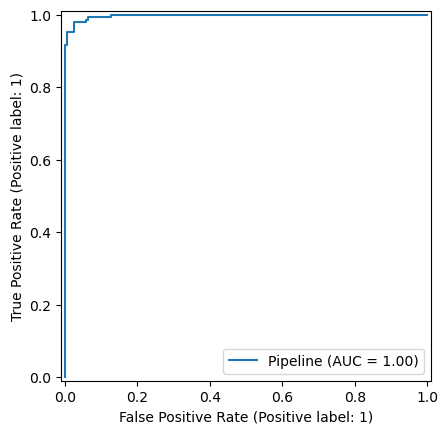

In [100]:
RocCurveDisplay.from_estimator(log_pipeline, X_test, y_test)

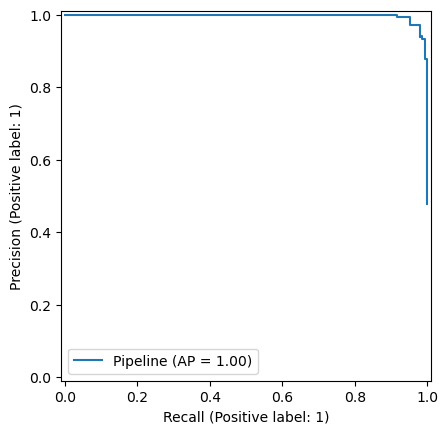

In [101]:
PrecisionRecallDisplay.from_estimator(log_pipeline, X_test, y_test)

In [102]:
final_log_model = LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=5000,random_state=101)

## Model SVM z wykorzystaniem GridSerach'a i walidacji krzyżowej

#### Maszyny wektorów nośnych (SVM) - omówienie metody z cytowaniem
 
Halder i współpracownicy [2] omawiają SVM, które szukają optymalnej granicy (hiperpłaszczyzny) oddzielającej klasy. Dla liniowego przypadku SVM rozwiązuje:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

przy ograniczeniach:

$$
y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1, \quad i = 1, \ldots, m
$$

gdzie:

- $\mathbf{w}$ — wektor wag,
- $b$ — przesunięcie (bias),
- $y_i \in \{-1, 1\}$ — etykiety klas,
- $\mathbf{x}_i$ — wektor cech.

W przypadku nieliniowych danych stosuje się funkcję jądra $K(\mathbf{x}_i, \mathbf{x}_j)$, która mapuje dane do przestrzeni wyższej wymiarowości.

In [103]:
from sklearn.svm import SVC

In [104]:
svc_model = SVC(random_state=101, probability=True)
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

svc_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', grid)])

In [105]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=SVC(probability=True, random_state=101),
                              param_grid={'C': [0.01, 0.1, 1],
                                          'kernel': ['linear', 'rbf']},
                              scoring='accuracy'))])

In [106]:
svc_pipeline.named_steps['classifier'].best_params_

{'C': 1, 'kernel': 'rbf'}

In [107]:
y_pred = svc_pipeline.predict(X_test)

In [108]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = 2*(recall*precision)/(precision+recall)

models_stat['SVM']=[acc, recall, precision, f1]

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {f1}')

Accuracy score: 0.9533333333333334
Recall score: 0.9300699300699301
Precision score: 0.9708029197080292
F1 score: 0.9500000000000001


In [109]:
confusion_matrix(y_test, y_pred)

array([[153,   4],
       [ 10, 133]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.97      0.93      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



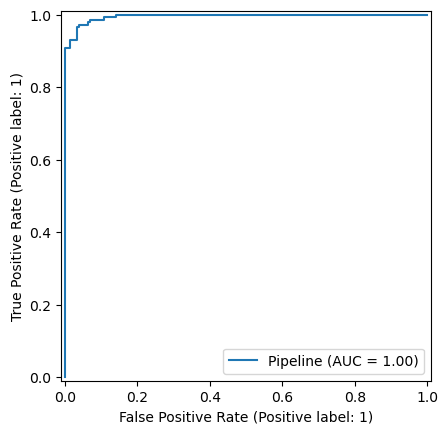

In [111]:
RocCurveDisplay.from_estimator(svc_pipeline, X_test, y_test)

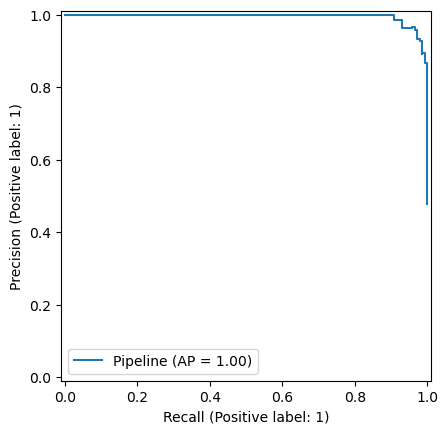

In [112]:
PrecisionRecallDisplay.from_estimator(svc_pipeline, X_test, y_test)


In [113]:
final_svc_model = SVC(kernel='rbf', C=1, random_state=101, probability=True)

## K Nearest Neighbors z wykorzystaniem GridSearch'a i walidacji krzyżowej

#### K-najbliżsi sąsiedzi (KNN) - omówienie metody z cytowaniem

Prasath i współpracownicy [3] opisują algorytm KNN, który klasyfikuje próbkę na podstawie klas \(K\) najbliższych punktów.

Podstawową metryką jest odległość euklidesowa:

$$
d(\mathbf{x}, \mathbf{x}') = \sqrt{\sum_{j=1}^n (x_j - x'_j)^2}
$$

Klasa próbki to najczęściej występująca klasa wśród jej \(K\) najbliższych sąsiadów.

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,20)}
grid = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='accuracy')


knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', grid)])

In [116]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': range(1, 20)},
                              scoring='accuracy'))])

In [117]:
knn_pipeline.named_steps['classifier'].best_params_

{'n_neighbors': 17}

In [118]:
y_pred = knn_pipeline.predict(X_test)

In [119]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = 2*(recall*precision)/(precision+recall)

models_stat['KNN']=[acc, recall, precision, f1]

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {f1}')

Accuracy score: 0.9066666666666666
Recall score: 0.9020979020979021
Precision score: 0.9020979020979021
F1 score: 0.9020979020979021


In [120]:
confusion_matrix(y_test, y_pred)

array([[143,  14],
       [ 14, 129]], dtype=int64)

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       157
           1       0.90      0.90      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



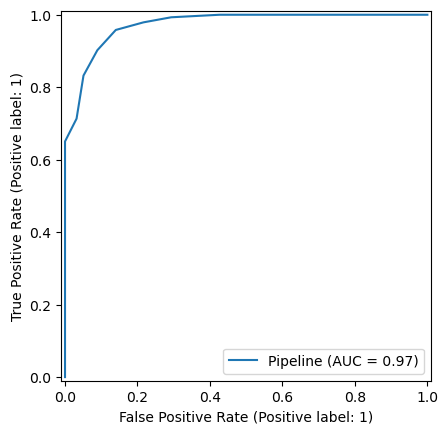

In [122]:
RocCurveDisplay.from_estimator(knn_pipeline, X_test, y_test)

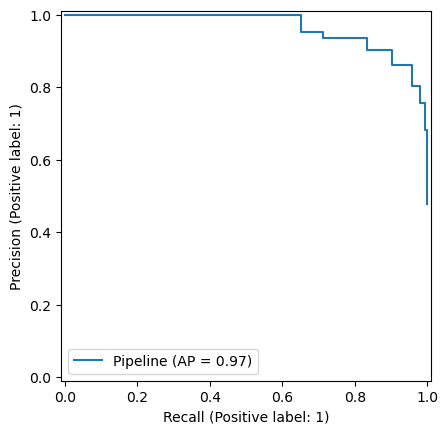

In [123]:
PrecisionRecallDisplay.from_estimator(knn_pipeline, X_test, y_test)

In [124]:
final_knn_model = KNeighborsClassifier(n_neighbors=17)

## Model hybrydowy

#### Model hybrydowy - omówienie metody z cytowaniem 

Cunningham i Delany w publikacji [4] proponują model hybrydowy, łączący wyniki regresji logistycznej, SVM oraz KNN. Można to formalnie zapisać jako agregację predykcji:

$$
\hat{y} = \text{majority\_vote}\big( h_{\text{logistic}}(x),\ h_{\text{SVM}}(x),\ h_{\text{KNN}}(x) \big)
$$

gdzie:

- $h_{\mathrm{logistic}}(x)$, $h_{\mathrm{SVM}}(x)$, $h_{\mathrm{KNN}}(x)$ — predykcje poszczególnych modeli,  
- $\hat{y}$ — ostateczna przewidywana klasa (np. przez głosowanie większościowe).



Taka metoda pozwala łączyć mocne strony różnych klasyfikatorów dla poprawy dokładności.

In [125]:
from sklearn.ensemble import VotingClassifier

voting=**'soft'** - zbiera prawdopodobieństwa przynależności do każdej klasy z każdego modelu i oblicza ich średnią

In [126]:
hybrid_model = VotingClassifier(
    estimators=[
        ('logistic', final_log_model),
        ('svc', final_svc_model),
        ('knn', final_knn_model)
    ],
    weights=[3, 2, 1],
    voting='soft'
)

hybrid_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', hybrid_model)
])


In [127]:
hybrid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 VotingClassifier(estimators=[('logistic',
                                               LogisticRegression(C=1,
                                                                  max_iter=5000,
                                                                  penalty='l1',
                                                                  random_state=101,
                                                                  solver='saga')),
                                              ('svc',
                                               SVC(C=1, probability=True,
                                                   random_state=101)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=17))],
                                  voting='soft', weights=[3, 2, 1]))])

In [128]:
y_pred = hybrid_pipeline.predict(X_test)

In [129]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = 2*(recall*precision)/(precision+recall)
models_stat['Hybrid']=[acc, recall, precision, f1]

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {f1}')

Accuracy score: 0.97
Recall score: 0.9440559440559441
Precision score: 0.9926470588235294
F1 score: 0.967741935483871


In [130]:
confusion_matrix(y_test, y_pred)

array([[156,   1],
       [  8, 135]], dtype=int64)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [132]:
RocCurveDisplay.from_estimator(hybrid_pipeline, X_test, y_test)

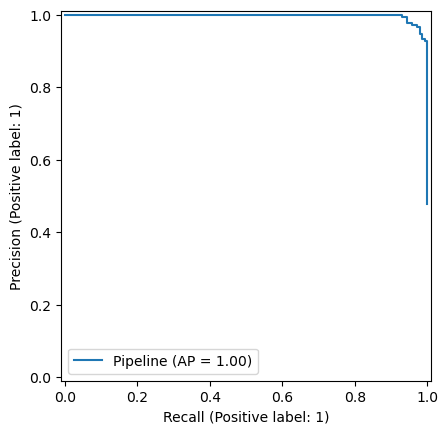

In [133]:
PrecisionRecallDisplay.from_estimator(hybrid_pipeline, X_test, y_test)

## Użycie modeli na sztucznych obserwacjach

In [134]:
def model_test(model):
    model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)])

    model_pipeline.fit(X, y)

    b1 = ['Burro', 'Philippines', 4, 19.3, 4, 15.1, 155, 14, 555, 2222, 114]
    b2 = ['Cavendish', 'Ecuador', 5, 20.0, 5, 16.0, 160, 15, 600, 2300, 120]
    
    sample_banana = pd.DataFrame(data=[b1, b2], columns=X.columns)
    prob = model_pipeline.predict_proba(sample_banana)

    return [prob]
    

In [135]:
log = model_test(final_log_model)
svc = model_test(final_svc_model)
knn = model_test(final_knn_model)
hybrid = model_test(hybrid_model)

probabilities = np.concatenate([log, svc, knn, hybrid], axis=0)
reshaped = probabilities.reshape(8, 2)

models = ['Logistic Regression', 'SVC', 'KNN', 'Hybrid']
bananas = ['banan_1', 'banan_2']

index = pd.MultiIndex.from_product([models, bananas], names=["model", "Banan"])
df = pd.DataFrame(reshaped, index=index, columns=["Processing", "Good"])
df.T



model      Logistic Regression                 SVC                 KNN  \
Banan                  banan_1   banan_2   banan_1   banan_2   banan_1   
Processing            0.953264  0.014206  0.878713  0.008747  0.705882   
Good                  0.046736  0.985794  0.121287  0.991253  0.294118   

model                   Hybrid            
Banan        banan_2   banan_1   banan_2  
Processing  0.176471  0.887183  0.039431  
Good        0.823529  0.112817  0.960569

## Porównanie modeli

In [136]:
pd.DataFrame(models_stat, index=['Accuracy', 'Recall', 'Precision', 'F1 score'])

Logistic Regression       SVM       KNN    Hybrid
Accuracy              0.966667  0.953333  0.906667  0.970000
Recall                0.951049  0.930070  0.902098  0.944056
Precision             0.978417  0.970803  0.902098  0.992647
F1 score              0.964539  0.950000  0.902098  0.967742

### Wnioski:    
- **Hybrid model** konsekwentnie osiąga najlepsze wyniki w trzech z czterech metryk (Accuracy, Precision, F1 score), co sugeruje, że jest najbardziej zrównoważony i efektywny ogólnie.

- **Logistic Regression** bardzo dobrze radzi sobie z Recall, co oznacza, że model skutecznie wykrywa przypadki pozytywne (niewielki odsetek False Negatives).

- **SVM** to solidny model pod względem wszystkich metryk, ale nie osiąga najwyższych wyników w żadnej z nich.

- **KNN** wypada najsłabiej we wszystkich kategoriach.

Bibliografia
1.	Cunningham, P., & Delany, S. J. (2020). k-Nearest Neighbour Classifiers: 2nd Edition (with Python examples). arXiv. Available at: https://arxiv.org/abs/2004.04523
2.	Halder, R. K., Uddin, M. N., Uddin, M. A., & Aryal, S. (2024). Enhancing K-nearest neighbor algorithm: a comprehensive review and performance analysis of modifications. Journal of Big Data, 11(113). Available at: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-024-00973-y
3.	Prasath, V. B. S., Abu Alfeilat, H. A., Hassanat, A. B. A., Lasassmeh, O., Tarawneh, A. S., Alhasanat, M. B., & Salman, H. S. E. (2017). Distance and Similarity Measures Effect on the Performance of K-Nearest Neighbor Classifier -- A Review. arXiv. Available at: https://arxiv.org/abs/1708.04321
4.	Cunningham, P., & Delany, S. J. (2020). k-Nearest Neighbour Classifiers: 2nd Edition (with Python examples). arXiv. Available at: https://arxiv.org/abs/2004.04523

5. Biblioteki python:

* Pandas

Dokumentacja: https://pandas.pydata.org/

* Matplotlib

Dokumentacja: https://matplotlib.org/

* NumPy

Dokumentacja: https://numpy.org/

* Seaborn

Dokumentacja: https://seaborn.pydata.org/

* Sklearn

Dokumentacja: https://scikit-learn.org

